# Helping chemists design selective JAK inhibitors

# The dataset

Here's the kinase dataset we'd like you to work with:

In [2]:
import pandas as pd
df = pd.read_csv('./kinase_JAK.csv')
df.head()

,SMILES,measurement_type,measurement_value,Kinase_name
0,C#CCCOC(=O)N1CCC(n2cc(C(N)=O)c(Nc3ccc(F)cc3)n2...,pIC50,6.81,JAK2
1,C#CCCOC(=O)N1CCC(n2cc(C(N)=O)c(Nc3ccc(F)cc3)n2...,pIC50,8.05,JAK1
2,C#CCN(c1ccc(C#N)cn1)C1CCN(c2ncnc3[nH]ccc23)C1,pIC50,10.26,JAK2
3,C#CCN(c1ccc(C#N)cn1)C1CCN(c2ncnc3[nH]ccc23)C1,pIC50,10.26,JAK1
4,C#CCNCC1CCC(c2nnn3cnc4[nH]ccc4c23)CC1,pIC50,7.36,JAK2


There are 10725 measurements in total.

SMILES is a text encoding of a molecular structure. You can read about it [here](https://www.daylight.com/dayhtml/doc/theory/theory.smiles.html), but you don't have to. 

measurement_type specifies how the measurement was being done. There are two types of measurements: pIC50 and pKi. For both measurements, a higher number means that the molecule binds stronger to the protein. 


measurement_value is the value of the measurement. 

Kinase_name is the name of the kinase that the molecule has been measured against. There are 4 different kinases in this dataset: JAK1, JAK2, JAK3, and TYR2. 

Our goal is to predict the pKi of a molecule against JAK1, JAK2, JAK3, and TYK2. 

# Basic RDKit¶


rdkit is the most popular cheminformatics package for python. Unfortunately it has awful documentation: http://rdkit.org/docs/index.html

In [3]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (400, 300)
IPythonConsole.ipython_useSVG=True

You can use it to visualize SMILES strings like this, if you want to visually inspect the data:


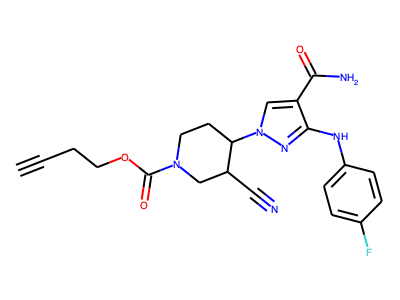

In [4]:
# Chem.MolFromSmiles returns a Chem.Mol object, which rdkit automatically visualizes in a jupyter notebook
Chem.MolFromSmiles(df['SMILES'][0])

# Tokenization

For text-based models, here is a tokenizer that can be used

In [1]:
def smiles_tokenizer(smi):
    """ 
    Tokenize a SMILES string representation of a molecule
    Returns a list of tokens in SMILES vocabulary
    """
    import re
    pattern =  "(\[[^\]]+]|Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\(|\)|\.|=|#|-|\+|\\\\|\/|:|~|@|\?|>|\*|\$|\%[0-9]{2}|[0-9])"
    regex = re.compile(pattern)
    tokens = [token for token in regex.findall(smi)]
    assert smi == ''.join(tokens)
    return tokens